# Grouping and Aggregating Data

pandas library provides a flexible and high-performance "groupby" facility that enables you to slice,dice and summarize data sets. This follows a pattern known as split-apply-combine. This pattern data is first categorized into groups based on a criteria such as the indexes or values within the columns. Each group is then processed with an aggregation or transformation function, returning a set of data with transformed values or a single aggregate summary for each group. pandas then combines all of these results and presents it in a single data structure.

#### Setting up the notebook

In [1]:
# import numpy,pandas
import numpy as np
import pandas as pd

# set some pandas options for controlling output
pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)

# inline graphics
%matplotlib inline

## Split-Apply-Combine (SAC) Pattern

Many data analysis problems utilize a pattern of processing data known as split-apply-combine. In this pattern, three steps are taken to analyze data:
1. A data set is split into smaller pieces
2. Each of these pieces are operated upon independently
3. All of the results are combined back together and presented as a single unit

This patttern is actually similar to the concepts in MapReduce. In MapReduce, massive sets of data, that are too big for a single computer, are divivided into pieces and dispatched to many systems to spread the load in manageable pieces (split). Each system then performs analysis on the data and calculates a result(apply). The results are then collected from each system and used for decision making (combined).

Once the data is split into groups one or more of the following three operations are applied:

* Aggregation - This calculates a summary statistics such as group means or counts of the items in each group
* Transformation - This performs group or item specific calculations and returns a set of like-indexed results
* Filtration - This removes entire groups of data based on a group level computation.

The combine stage of the pattern is performed automatically by pandas, which will collect the results of the apply stage on all of the groups and construct a single merged result.

To Read: http://www.jstatsoft.org/v40/i01/paper


## Split

In [2]:
# load the sensors data
sensors = pd.read_csv("../../data/sensors.csv")
sensors

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[24 rows x 4 columns]

#### Grouping by a single column value

The sensor data consists of three categorical variables (sensor, interval and axis) and one continuous variable (reading). In pandas, it is possible to group by any single categorical variable by passing its name to .groupby().

In [3]:
# group this data by the sensor column / variable
# returns a DataFrameGroupBy object
grouped = sensors.groupby('sensor')
grouped

The result of calling .groupby() on DataFrame is not the actual grouped data, but a DataFrameGroupBy object. The actual process of grouping is a deferred / lazy process in pandas, and at this point the grouping has not actually been performed.

In [4]:
# get the number of groups that this will create
grouped.ngroups

2

In [5]:
# what are the groups that were found?
grouped.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')}

#### Accessing the results of grouping

In [6]:
# a helper function to print the contents of the groups
def print_groups(groupobject):
    # loop over all groups, printing the group name
    # and group details
    for name, group in groupobject:
        print(name)
        print(group)
        
# examine the content of the groups we created
print_groups(grouped)

accel
    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[12 rows x 4 columns]


The examination of these results gives us some insight into how pandas has performed the split that we specified. A group has been created for each distinct value in the sensors columns and has been named with that value. The group contains a DataFrame object whose content is the rows where the sensor value matched the name of the group.

In [7]:
grouped.size()

sensor
accel          12
orientation    12
dtype: int64

In [8]:
# get the count of items in each column of each group
grouped.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [9]:
# get the data in one specific group
grouped.get_group('accel')

    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]

In [10]:
# get the first three items in each group
grouped.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [11]:
# get the first item in each group
grouped.nth(0)

            axis  interval  reading
sensor                             
accel          Z         0      0.0
orientation    Z         0      0.0

In [12]:
# get the second item in each group
grouped.nth(1)

            axis  interval  reading
sensor                             
accel          Y         0      0.5
orientation    Y         0      0.1

In [13]:
grouped.nth(2)

            axis  interval  reading
sensor                             
accel          X         0      1.0
orientation    X         0      0.0

Grouping can also be performed on multiple columns by passing a list of column names. The following groups the data by both sensor and axis variables:

In [14]:
# group by both sensor and axis values
mcg = sensors.groupby(['sensor','axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [15]:
# get descriptive statistics for each
mcg.describe()

                 interval                           ...  reading               \
                    count mean       std  min   25% ...      min    25%   50%   
sensor      axis                                    ...                         
accel       X         4.0  1.5  1.290994  0.0  0.75 ...      0.7  0.775  0.85   
            Y         4.0  1.5  1.290994  0.0  0.75 ...      0.2  0.275  0.35   
            Z         4.0  1.5  1.290994  0.0  0.75 ...      0.0  0.075  0.15   
orientation X         4.0  1.5  1.290994  0.0  0.75 ...      0.0  0.075  0.15   
            Y         4.0  1.5  1.290994  0.0  0.75 ...      0.1  0.175  0.25   
            Z         4.0  1.5  1.290994  0.0  0.75 ...      0.0  0.000  0.00   

                              
                    75%  max  
sensor      axis              
accel       X     0.925  1.0  
            Y     0.425  0.5  
            Z     0.225  0.3  
orientation X     0.225  0.3  
            Y     0.325  0.4  
            Z     0.00

By default, groups are sorted by their group name in an ascending order. If you want to prevent sorting during grouping use the sort=False option.

#### Grouping using index levels

In [16]:
# make a copy of the data and reindex the copy
mi = sensors.copy()
mi = mi.set_index(['sensor','axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [17]:
# group by first level of index
mig_11 = mi.groupby(level=0)
print_groups(mig_11)

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
...               ...      ...
       Y            2      0.3
       X            2      0.8
       Z            3      0.3
       Y            3      0.2
       X            3      0.7

[12 rows x 2 columns]
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
...                    ...      ...
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[12 rows x 2 columns]


In [18]:
# group by multiple levels of the index
mig_112 = mi.groupby(level=['sensor','axis'])
print_groups(mig_112)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

## Apply

After the grouping is performed, we have the ability to perform either aggregate calculations on each group of data resulting in a single value from each group or to apply a transformation to each item in a group and return the combined result for each group.

We can also filter groups based on results of expressions to exclude the groups from being included in the combined results.

#### Applying aggregation functions to groups

pandas allows the application of an aggregation function to each group of data. Aggregation is performed using the .aggregate() method of the GroupBy object.

In [19]:
# calculate the mean for each sensor / axis
mig_112.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [20]:
# do not create an index matching the original object
sensors.groupby(['sensor','axis'],as_index=False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [21]:
# can simply apply the agg function to the group by object
mig_112.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [23]:
# apply multiple aggregation functions at once
mig_112.agg([np.sum,np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

A different function can be applied to each column in each group by passing a Python dictionary to .agg(), where the keys of the dictionary represent the column name that the function is to be applied to and the value is the function.

In [24]:
# apply a different function to each column
mig_112.agg({'interval':len,'reading':np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

Aggregation can also be performed on specific columns using the [] operator on the GroupBy object.

In [25]:
# calculare the mean of the reading column
mig_112['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

### Transformation of Group Data

The GroupBy objects provide a .transform() method, which applies a function to each group and returns either the Series or DataFrame that has the following parameters

* Indexed identically to the concatenation of the indexes in all groups.
* Number of rows is equal to the sum of the number of rows in all the groups.
* Consists of non-noise, non-grouped columns to which pandas has applied the given function.

In [26]:
# DataFrame for example
df = pd.DataFrame({'Label':['A','C','B','A','C'],
                  'Values':[0,1,2,3,4],
                  'Values2':[5,6,7,8,9],
                  'Noise': ['foo','bar','baz','foobar','barbaz']})
df

  Label   Noise  Values  Values2
0     A     foo       0        5
1     C     bar       1        6
2     B     baz       2        7
3     A  foobar       3        8
4     C  barbaz       4        9

In [27]:
# group by label
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label   Noise  Values  Values2
0     A     foo       0        5
3     A  foobar       3        8
B
  Label Noise  Values  Values2
2     B   baz       2        7
C
  Label   Noise  Values  Values2
1     C     bar       1        6
4     C  barbaz       4        9


In [28]:
# add ten to all values in all columns
grouped.transform(lambda x: x + 10)

   Values  Values2
0      10       15
1      11       16
2      12       17
3      13       18
4      14       19

To understand what is going on more clearly, we can change the function being passed to .transform() to write some diagnostic information.

In [29]:
# a function to print the input before we are adding 10 to it
def xplus10(x):
    print(x)
    return x + 10

# transform using xplus10
grouped.transform(xplus10)

0       foo
3    foobar
Name: Noise, dtype: object
0       foo
3    foobar
Name: Noise, dtype: object
0       foo
3    foobar
Name: A, dtype: object
0    0
3    3
Name: A, dtype: int64
2    2
Name: B, dtype: int64
1    1
4    4
Name: C, dtype: int64
0    5
3    8
Name: A, dtype: int64
2    7
Name: B, dtype: int64
1    6
4    9
Name: C, dtype: int64


   Values  Values2
0      10       15
1      11       16
2      12       17
3      13       18
4      14       19

pandas has called the transformation function nine times, one time for every column in every group (3 x 3) and passed a Series object for each combination of group / rows / column and for each of these calls, pandas stores the results and when complete, does a merge of the results back in to DataFrame that is indexed identically to the original data.

In [30]:
# sum returns existing as it is applied to each individual item
grouped.transform(lambda x:x.sum())

       Noise Values Values2
0  foofoobar      3      13
1  barbarbaz      5      15
2        baz      2       7
3  foofoobar      3      13
4  barbarbaz      5      15

#### Practical Examples of Transformation

A common transformation in statistical analysis, with grouped data, is to replace missing data within each group with the mean of the non-Nan values in the group.

In [31]:
# data to demonstrate replacement on NaN
df = pd.DataFrame({'Label':list("ABABAB"),
                   'values':(10,20,11,np.NaN,12,22)},
                 index = ['i1','i2','i3','i4','i5','i6'])
df

   Label  values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B     NaN
i5     A    12.0
i6     B    22.0

In [32]:
# group by label
grouped = df.groupby('Label')
print_groups(grouped)

A
   Label  values
i1     A    10.0
i3     A    11.0
i5     A    12.0
B
   Label  values
i2     B    20.0
i4     B     NaN
i6     B    22.0


In [33]:
# calculate the mean of the two groups
grouped.mean()

       values
Label        
A        11.0
B        21.0

In [34]:
# use transform to fill the NaN with mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

    values
i1    10.0
i2    20.0
i3    11.0
i4    21.0
i5    12.0
i6    22.0

In [35]:
type(filled_NaNs)

pandas.core.frame.DataFrame

The result appears odd at a first glance because of the following reasons:
    
* It does not have a Label column
* It has returned the Series object when we passed DataFrame to it
* It does not provide an explicit statemtn of which values in which group have been filled with the mean of the group.

On the first two points, our original DataFrame has two columns one of which was used in the grouping process. This column is not passed to the .transform() method and in this scenario the only column processed is Values. Upon applying the .transform() method on each group, pandas merges the results which are all Series objects.

With respect to the third point, we do not know which values in which groups were changed, but we do know the index in the original data as the index labels are preserved through the process.

In [37]:
# overwrite old values with the new ones
df.values = filled_NaNs
df

   Label  values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B    21.0
i5     A    12.0
i6     B    22.0

Another common and practical example is that of using .transform() in statistical analysis and is the process of normalizing multiple groups of data to have a mean 0 and a standard deviation of 1 also referred to as creating a normalized z score of the data.

In [39]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5,2,365 * 3),
                pd.date_range('2001-01-01', periods=365*3))
rolling = pd.rolling_mean(data,100,100).dropna()
rolling

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,min_periods=100,center=False).mean()
  """


2001-04-10    0.073603
2001-04-11    0.057313
2001-04-12    0.089255
2001-04-13    0.133248
2001-04-14    0.175876
                ...   
2003-12-27    0.811402
2003-12-28    0.835961
2003-12-29    0.850998
2003-12-30    0.842293
2003-12-31    0.848419
Freq: D, Length: 996, dtype: float64

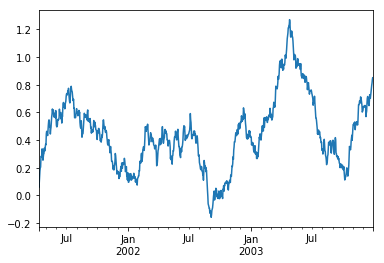

In [40]:
rolling.plot()

In [42]:
# calculate mean and std by year
groupkey = lambda x:x.year
groups = rolling.groupby(groupkey)
groups.agg([np.mean,np.std])

          mean       std
2001  0.454233  0.171988
2002  0.286502  0.182040
2003  0.599447  0.275786

In [43]:
# normalize to the z score
zscore = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(groupkey).transform(zscore)
normed.groupby(groupkey).agg([np.mean,np.std])

              mean  std
2001 -3.172066e-17  1.0
2002 -1.881296e-15  1.0
2003 -1.492261e-15  1.0

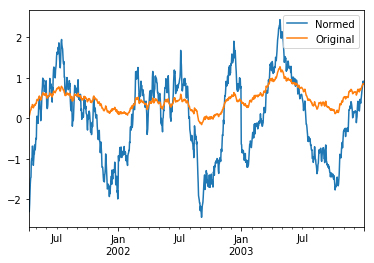

In [44]:
# plot original vs normalize
compared = pd.DataFrame({'Original': rolling,'Normed':normed})
compared.plot()

In [45]:
# check the distribution # within one std
# should be roughly 64.2%
normed_inlstd = normed[np.abs(normed) <= 1.0].count()
float(normed_inlstd) / len(normed)

0.6485943775100401

## Filtering Groups

pandas GroupBy object provides a .filter() method, which can be used to make group level decisions on whether or not the entire group is included in the result after the combination. The function passed to .filter() should return True if the group is to be included in the result and False to exclude it.

In [46]:
# data for our examples
df = pd.DataFrame({'Label':list("AABBCC"),
                  'Values':(1,2,3,4,np.nan,8)})
df

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     B     4.0
4     C     NaN
5     C     8.0

In [47]:
# drop groups with one or fewer non-NaN values
f = lambda x:x.Values.count() > 1
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     B     4.0

Notice that there is a subtle difference when it comes to using .filter() as compared to .translate(). The data passed to the function specified in the call to .filter() is passed to the columns specified in the .groupby( method.

In [48]:
# drop any groups with NaN values
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     B     4.0

In [50]:
# select groups with a mean of 2.0 or greater
grouped = df.groupby('Label')
mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() -mean) > 2.0
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
4     C     NaN
5     C     8.0

In [52]:
# replace values in a group where the # of items is <=1
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f,dropna=False)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     B     4.0
4   NaN     NaN
5   NaN     NaN

## Discretization and Binning

Discretization is the process of slicing up continuous data into a set of "bins" where each bin represents a range of the continous sample and items are then placed into the appropriate bin hence the term "binning".

Discretization in pandas is performed using the pd.cut() and pd.qcut() functions.

In [53]:
# generate 10000 normal random #'s
np.random.seed(123456)
dist = np.random.normal(size=10000)

# show the mean and std
"{0} {1}".format(dist.mean(),dist.std())

'-0.002863324040906651 1.008716203199891'

In [54]:
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [55]:
# split the data into 5 bins
bins = pd.cut(dist,5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [56]:
# show the categories in bins
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]]
              closed='right',
              dtype='interval[float64]')

In [57]:
# demonstrate the math to calculate the bins
min = dist.min()
max = dist.max()
delta = max - min
iwidth = delta / 5
extra = delta * 0.001
intervals = np.arange(min,max*extra,iwidth)
intervals[0] -= delta*0.001
intervals

array([-3.52809473, -2.07714421, -0.63341235])

In [58]:
# codes tells us which bin each item is in
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

The notation for the intervals follows standard mathematical intervals where a parenthesis represents that the end is open while square brackets are closed. Closed ends include values at that exact number. By default pandas closes the right-handed side of intervals.

In [59]:
# move the closed side of the interval to the left
pd.cut(dist,5,right=False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)]
              closed='left',
              dtype='interval[float64]')

In [60]:
# generate 50 ages between 6 and 45
np.random.seed(123456)
ages = np.random.randint(6,45,50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [61]:
# cut into ranges and then get descriptive stats
ranges = [6,12,18,35,50]
agebins = pd.cut(ages,ranges)
agebins.describe()

            counts  freqs
categories               
(6, 12]          8   0.16
(12, 18]         9   0.18
(18, 35]        21   0.42
(35, 50]        12   0.24

In [62]:
# add names for the bins
ranges = [6,12,18,35,50]
labels = ['Youth','Young Adult','Adult','Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

             counts  freqs
categories                
Adult            21   0.42
Middle Aged      12   0.24
Young Adult       9   0.18
Youth             8   0.16

Data can be sliced according to specified quantities using pd.qcut(). This is the process of placing the values into bins such that each bin has the same number of items. To do this, the ranges of the quantities must be determined during the process so that the distribution is even.

In [63]:
# cut into quantiles
# 5 bins with an equal quality of items
qbin = pd.qcut(dist,5)
# this will tell us the range of values in each quantile
qbin.describe()

                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

In [64]:
# make the quantiles at the +/- 3,2 and 1 std deviations
quantiles = [0,0.001,0.021,0.5-0.341,0.5,0.5+0.341,1.0-0.021,1.0-0.001,1.0]
qbin = pd.qcut(dist,quantiles)
# this data should be a perfect normal distribution
qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001